<a href="https://colab.research.google.com/github/adalves-ufabc/2022.Q2-PLN/blob/main/2022_Q2_PLN_Notebook_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2022.Q2]**
Prof. Alexandre Donizeti Alves

### **Similaridade de Texto**

O objetivo principal da **Similaridade de Texto** é analisar e medir a proximidade entre duas entidades de texto. Essas entidades de texto podem ser tokens ou termos simples, como palavras ou documentos inteiros, que podem incluir frases ou parágrafos de texto. Existem várias maneiras de analisar a similaridade do texto e podemos classificar a intenção da similaridade do texto amplamente nas duas áreas a seguir:



* **Similaridade lexical**: envolve observar o conteúdo dos documentos de texto no que diz respeito à sua sintaxe, estrutura e conteúdo e
medindo sua similaridade com base nesses parâmetros.
* **Similaridade semântica**: envolve determinar a semântica,
significado e contexto dos documentos e, em seguida, determinar como
eles estão próximos um do outro. Gramáticas de dependência e Reconhecimento de Entidades são ferramentas úteis que podem ajudar nisso.

>
Nestes exemplos, cobrimos a similaridade lexical. As métricas de distância são normalmente usadas para medir pontuações de similaridade entre entidades de texto e cobrimos as seguintes áreas de similaridade de texto:
* **Similaridade de termos**: semelhança entre tokens ou palavras individuais.
* **Similaridade de documentos**: semelhança entre documentos de texto inteiros.

### **Similiaridade de Termos**

Começaremos analisando similaridade de termos, ou similaridade entre tokens de palavras individuais, para ser mais preciso. Embora não seja muito usado em aplicações práticas, pode ser um excelente ponto de partida para entender a semelhança do texto. 

>
Vários aplicativos e casos de uso como *autocompleters*, verificação ortográfica e corretores usam essas técnicas para corrigir termos com erros ortográficos. 
>
Aqui, pegamos algumas palavras e medimos a semelhança entre elas, usando diferentes representações de palavras, bem como métricas de distância. 

Aqui usaremos a **vetorização de caracteres**, que é um processo extremamente simples de apenas mapear cada caractere do termo para um número único correspondente. Podemos fazer isso usando a função descrita no trecho a seguir.

In [1]:
import numpy as np

In [2]:
def vectorize_terms(terms):
    terms = [term.lower() for term in terms]
    terms = [np.array(list(term)) for term in terms]
    terms = [np.array([ord(char) for char in term]) 
                for term in terms]
    return terms

In [4]:
root  = 'Believe'
term1 = 'beleive'
term2 = 'bargain'
term3 = 'Bwleivi'

terms = [root, term1, term2, term3]
terms

['Believe', 'beleive', 'bargain', 'Bwleivi']

In [5]:
import pandas as pd

# character vectorization
term_vectors = vectorize_terms(terms)

# show vector representations
vec_df = pd.DataFrame(term_vectors, index=terms)
print(vec_df)

          0    1    2    3    4    5    6
Believe  98  101  108  105  101  118  101
beleive  98  101  108  101  105  118  101
bargain  98   97  114  103   97  105  110
Bwleivi  98  119  108  101  105  118  105


Assim, você pode ver como podemos transformar facilmente cada termo do texto em uma representação vetorial numérica correspondente. 

>
**IMPORTANTE**: valores `NaN` indicam que essas strings são mais curtas, em comparação com a última string. 


In [6]:
root_term = root
other_terms = [term1, term2, term3]

root_term_vec = vec_df[vec_df.index == root_term].dropna(axis=1).values[0]
other_term_vecs = [vec_df[vec_df.index == term].dropna(axis=1).values[0]
                      for term in other_terms]

In [8]:
root_term_vec

array([ 98, 101, 108, 105, 101, 118, 101])

In [9]:
other_term_vecs

[array([ 98, 101, 108, 101, 105, 118, 101]),
 array([ 98,  97, 114, 103,  97, 105, 110]),
 array([ 98, 119, 108, 101, 105, 118, 105])]

Agora vamos usar várias métricas de distância para calcular a similaridade entre a palavra raiz e as outras três palavras, conforme apresentado no trecho de código anterior. Existem muitas métricas de distância que você pode usar para calcular e medir semelhanças. Aqui apresentamos cinco métricas.

**Distância de Hamming**

A [**distância de Hamming**](https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_de_Hamming) é uma métrica de distância muito popular, usada com frequência em teoria da informação e sistemas de comunicação.  Formalmente, é definida como o número de posições que possuem caracteres ou símbolos diferentes entre duas cadeias de comprimento igual. Vista de outra forma, ela corresponde ao menor número de substituições necessárias para transformar uma string na outra, ou o número de erros que transformam uma na outra.

In [10]:
def hamming_distance(u, v, norm=False):
    if u.shape != v.shape:
        raise ValueError('The vectors must have equal lengths.')
    return (u != v).sum() if not norm else (u != v).mean()

In [11]:
for term, term_vector in zip(other_terms, other_term_vecs):
    print('Hamming distance between root: {} and term: {} is {}'.format(root_term,
                                                                        term,
                                                                        hamming_distance(root_term_vec, 
                                                                                         term_vector, norm=False)))

Hamming distance between root: Believe and term: beleive is 2
Hamming distance between root: Believe and term: bargain is 6
Hamming distance between root: Believe and term: Bwleivi is 4


In [12]:
for term, term_vector in zip(other_terms, other_term_vecs):
    print('Normalized Hamming distance between root: {} and term: {} is {}'.format(root_term,
                                                                                   term,
                                                                                   round(hamming_distance(root_term_vec, 
                                                                                         term_vector, norm=True),
                                                                                         2)
                                                                                   ))

Normalized Hamming distance between root: Believe and term: beleive is 0.29
Normalized Hamming distance between root: Believe and term: bargain is 0.86
Normalized Hamming distance between root: Believe and term: Bwleivi is 0.57


**Distância de Manhattan**

A **distância de Manhattan**, também conhecida como distância pombalina, distância de quarteirões ou distância de taxi, recebeu esse nome pois define a menor distância possível que um carro é capaz de percorrer numa malha urbana reticulada ortogonal, tal como se encontram em zonas como Manhattan ou a Baixa Pombalina.

É semelhante à distância de Hamming conceitualmente onde, em vez de contar o número de incompatibilidades, subtraímos a diferença entre cada par de caracteres em cada posição das duas strings. Formalmente é definida como a distância entre dois pontos em uma grade baseada em caminhos estritamente horizontais ou verticais. Em vez da distância diagonal convencionalmente calculada pela métrica da distância Euclidiana. Resumidamente, é apenas a soma das diferenças entre x e y em cada dimensão.

In [13]:
def manhattan_distance(u, v, norm=False):
    if u.shape != v.shape:
        raise ValueError('The vectors must have equal lengths.')
    return abs(u - v).sum() if not norm else abs(u - v).mean()

In [14]:
for term, term_vector in zip(other_terms, other_term_vecs):
    print('Manhattan distance between root: {} and term: {} is {}'.format(root_term,
                                                                          term,
                                                                          manhattan_distance(root_term_vec, 
                                                                                             term_vector, norm=False)))

Manhattan distance between root: Believe and term: beleive is 8
Manhattan distance between root: Believe and term: bargain is 38
Manhattan distance between root: Believe and term: Bwleivi is 30


In [15]:
for term, term_vector in zip(other_terms, other_term_vecs):
    print('Normalized Manhattan distance between root: {} and term: {} is {}'.format(root_term,
                                                                                     term,
                                                                                     round(manhattan_distance(root_term_vec, 
                                                                                           term_vector, norm=True),
                                                                                           2)
                                                                                     ))

Normalized Manhattan distance between root: Believe and term: beleive is 1.14
Normalized Manhattan distance between root: Believe and term: bargain is 5.43
Normalized Manhattan distance between root: Believe and term: Bwleivi is 4.29


**Distância Euclidiana**

Formalmente, a distância euclidiana é definida como a distância em linha reta mais curta entre dois pontos. A Distância Euclidiana é definida como a soma da raiz quadrada da diferença entre x e y em suas respectivas dimensões.

In [16]:
def euclidean_distance(u,v):
    if u.shape != v.shape:
        raise ValueError('The vectors must have equal lengths.')
    distance = np.sqrt(np.sum(np.square(u - v)))
    return distance

In [17]:
for term, term_vector in zip(other_terms, other_term_vecs):
    print('Euclidean distance between root: {} and term: {} is {}'.format(root_term,
                                                                          term,
                                                                          round(euclidean_distance(root_term_vec, 
                                                                                                   term_vector),
                                                                                2)
                                                                          ))

Euclidean distance between root: Believe and term: beleive is 5.66
Euclidean distance between root: Believe and term: bargain is 17.94
Euclidean distance between root: Believe and term: Bwleivi is 19.29


**Distância Levenshtein**

Em teoria da informação, a **distância Levenshtein** ou distância de edição entre duas "strings" (duas sequências de caracteres) é dada pelo número mínimo de operações necessárias para transformar uma string na outra. Entendemos por "operações" a inserção, deleção ou substituição de um caractere. O nome advém do cientista russo Vladimir Levenshtein, que considerou esta distância já em 1965. É muito útil para aplicações que precisam determinar quão semelhantes duas strings são, como é por exemplo o caso com os verificadores ortográficos. 

A distância Levenshtein é usada para medir a distância entre duas sequências de strings com base em suas diferenças, semelhante ao conceito por trás da distância de Hamming. A distância de Levenshtein entre dois termos pode ser definida como o número mínimo de edições necessárias na forma de adições, exclusões ou substituições para alterar ou converter um termo em outro. Essas substituições são substituições baseadas em caracteres, onde um único caractere pode ser editado em uma única operação.

In [18]:
import copy
import pandas as pd

def levenshtein_edit_distance(u, v):
    # convert to lower case
    u = u.lower()
    v = v.lower()
    # base cases
    if u == v: return 0
    elif len(u) == 0: return len(v)
    elif len(v) == 0: return len(u)
    # initialize edit distance matrix
    edit_matrix = []
    # initialize two distance matrices 
    du = [0] * (len(v) + 1)
    dv = [0] * (len(v) + 1)
    # du: the previous row of edit distances
    for i in range(len(du)):
        du[i] = i
    # dv : the current row of edit distances    
    for i in range(len(u)):
        dv[0] = i + 1
        # compute cost as per algorithm
        for j in range(len(v)):
            cost = 0 if u[i] == v[j] else 1
            dv[j + 1] = min(dv[j] + 1, du[j + 1] + 1, du[j] + cost)
        # assign dv to du for next iteration
        for j in range(len(du)):
            du[j] = dv[j]
        # copy dv to the edit matrix
        edit_matrix.append(copy.copy(dv))
    # compute the final edit distance and edit matrix    
    distance = dv[len(v)]
    edit_matrix = np.array(edit_matrix)
    edit_matrix = edit_matrix.T
    edit_matrix = edit_matrix[1:,]
    edit_matrix = pd.DataFrame(data=edit_matrix,
                               index=list(v),
                               columns=list(u))
    return distance, edit_matrix

In [19]:
for term in other_terms:
    edit_d, edit_m = levenshtein_edit_distance(root_term, term)
    print('Computing distance between root: {} and term: {}'.format(root_term,
                                                                    term))
    print('Levenshtein edit distance is {}'.format(edit_d))
    print('The complete edit distance matrix is depicted below')
    print(edit_m)
    print('-'*30)

Computing distance between root: Believe and term: beleive
Levenshtein edit distance is 2
The complete edit distance matrix is depicted below
   b  e  l  i  e  v  e
b  0  1  2  3  4  5  6
e  1  0  1  2  3  4  5
l  2  1  0  1  2  3  4
e  3  2  1  1  1  2  3
i  4  3  2  1  2  2  3
v  5  4  3  2  2  2  3
e  6  5  4  3  2  3  2
------------------------------
Computing distance between root: Believe and term: bargain
Levenshtein edit distance is 6
The complete edit distance matrix is depicted below
   b  e  l  i  e  v  e
b  0  1  2  3  4  5  6
a  1  1  2  3  4  5  6
r  2  2  2  3  4  5  6
g  3  3  3  3  4  5  6
a  4  4  4  4  4  5  6
i  5  5  5  4  5  5  6
n  6  6  6  5  5  6  6
------------------------------
Computing distance between root: Believe and term: Bwleivi
Levenshtein edit distance is 4
The complete edit distance matrix is depicted below
   b  e  l  i  e  v  e
b  0  1  2  3  4  5  6
w  1  1  2  3  4  5  6
l  2  2  1  2  3  4  5
e  3  2  2  2  2  3  4
i  4  3  3  2  3  3  4
v  5  

**Distância cosseno e Similaridade por cosseno**

A **distância cosseno** é uma métrica que pode ser derivada da similaridade por cosseno e vice-versa. Considerando que temos dois termos representados em suas formas vetorizadas (saco de vetores de caracteres, em que a ordem dos caracteres não importa). A **similaridade por cosseno** nos dá a medida do cosseno do ângulo entre eles quando são representados como vetores positivos diferentes de zero em um espaço de produto interno.

In [20]:
def boc_term_vectors(word_list):
    word_list = [word.lower() for word in word_list]
    unique_chars = np.unique(
                        np.hstack([list(word) 
                        for word in word_list]))
    word_list_term_counts = [{char: count 
                                  for char, count in np.stack(
                                                         np.unique(list(word), 
                                                                   return_counts=True),
                                                         axis=1)}
                                 for word in word_list]
    
    boc_vectors = [np.array([int(word_term_counts.get(char, 0)) 
                            for char in unique_chars])
                   for word_term_counts in word_list_term_counts]
    return list(unique_chars), boc_vectors

In [21]:
# Bag of characters vectorization
import pandas as pd

feature_names, feature_vectors = boc_term_vectors(terms)
boc_df = pd.DataFrame(feature_vectors, columns=feature_names, index=terms)
print(boc_df)

         a  b  e  g  i  l  n  r  v  w
Believe  0  1  3  0  1  1  0  0  1  0
beleive  0  1  3  0  1  1  0  0  1  0
bargain  2  1  0  1  1  0  1  1  0  0
Bwleivi  0  1  1  0  2  1  0  0  1  1


In [22]:
root_term_boc = boc_df[vec_df.index == root_term].values[0]
other_term_bocs = [boc_df[vec_df.index == term].values[0]
                      for term in other_terms]

In [23]:
def cosine_distance(u, v):
    distance = 1.0 - (np.dot(u, v) / 
                        (np.sqrt(sum(np.square(u))) * np.sqrt(sum(np.square(v))))
                     )
    return distance

In [24]:
for term, boc_term in zip(other_terms, other_term_bocs):
    print('Analyzing similarity between root: {} and term: {}'.format(root_term,
                                                                      term))
    distance = round(cosine_distance(root_term_boc, boc_term), 2)
    similarity = round(1 - distance, 2)                                                           
    print('Cosine distance  is {}'.format(distance))
    print('Cosine similarity  is {}'.format(similarity))
    print('-'*40)

Analyzing similarity between root: Believe and term: beleive
Cosine distance  is -0.0
Cosine similarity  is 1.0
----------------------------------------
Analyzing similarity between root: Believe and term: bargain
Cosine distance  is 0.82
Cosine similarity  is 0.18
----------------------------------------
Analyzing similarity between root: Believe and term: Bwleivi
Cosine distance  is 0.26
Cosine similarity  is 0.74
----------------------------------------


**Referência:**

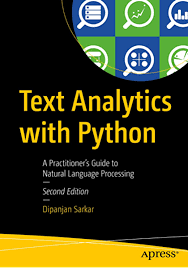


**Disponível em:**

> https://github.com/Apress/text-analytics-w-python-2e